In [29]:
# Import semua library yang dibutuhkan
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout, Conv2D, Flatten
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.metrics import Precision, Accuracy, Recall
from tensorflow.keras.callbacks import EarlyStopping

Di dalam dataset tersebut, terdapat 3 partisi data yang berbeda. Yaitu data training, validation dan juga testing. Berikut adalah perintah untuk melakukan proses loading gambar-gambar di dataset yang sudah kita ekstrak sebelumnya.

In [2]:
ls -l

total 44
drwx------ 6 van van  4096 Agu 21 09:45 dataset/
-rw-rw-r-- 1 van van 38125 Agu 21 10:37 indonesian-food-likes-bakso-rendang-etc.ipynb


In [3]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    'dataset/train',   # Source dari data train
    #classes = ['bakso', 'gado','gudeg','rendang','sate'],
    target_size=(200, 200),  # Semua gambar akan diresize menjadi 200x200
    batch_size=16, 
    class_mode="categorical")

test_generator = datagen.flow_from_directory(
    'dataset/test',  # Source dari data validation
    #classes = ['bakso', 'gado','gudeg','rendang','sate'],
    target_size=(200, 200),  # Semua gambar akan diresize menjadi 200x200
    batch_size=16, 
    class_mode="categorical")

valid_generator = datagen.flow_from_directory(
    'dataset/valid',  # Source dari data validation
    #classes = ['bakso', 'gado','gudeg','rendang','sate'],
    target_size=(200, 200),  # Semua gambar akan diresize menjadi 200x200
    batch_size=16, 
    class_mode="categorical")

Found 7274 images belonging to 5 classes.
Found 913 images belonging to 5 classes.
Found 902 images belonging to 5 classes.


## Membuat model menggunakan architecture CNN untuk klasifikasi model

In [4]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(200,200, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

/home/van/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-08-21 10:37:39.161881: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-21 10:37:39.167964: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skippi

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,166,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,208,357 (8.42 MB)

 Trainable params: 2,208,357 (8.42 MB)

 Non-trainable params: 0 (0.00 B)

## Model compile

In [6]:
# Kita akan menggunakan Recall, Precision dan Accuracy untuk bahan evaluasi model.
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics= [Recall(), Precision(), "accuracy"]
)

In [7]:
# Model callback berikut ini digunakan untuk memberhentikan proses training dengan 
# ketentuan jika nilai loss dalam 3 iterasi selanjutnya sudah tidak menurun.
# model_callback = EarlyStopping(
#     monitor = 'loss',
#     verbose = 1,
#     mode = 'min',
#     patience= 3
# )

In [10]:
# Lakukan proses training.
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=45,
    steps_per_epoch=50,
    # callbacks = [model_callback],
    verbose=1
)

Epoch 1/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8717 - loss: 0.3852 - precision: 0.8898 - recall: 0.8559 - val_accuracy: 0.7284 - val_loss: 0.7609 - val_precision: 0.7632 - val_recall: 0.7040
Epoch 2/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8637 - loss: 0.3881 - precision: 0.8848 - recall: 0.8291 - val_accuracy: 0.7262 - val_loss: 0.7958 - val_precision: 0.7524 - val_recall: 0.6940
Epoch 3/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8373 - loss: 0.4447 - precision: 0.8765 - recall: 0.8016 - val_accuracy: 0.7594 - val_loss: 0.7843 - val_precision: 0.7897 - val_recall: 0.7328
Epoch 4/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8572 - loss: 0.4087 - precision: 0.8885 - recall: 0.8305 - val_accuracy: 0.7583 - val_loss: 0.7593 - val_precision: 0.7924 - val_recall: 0.7195
Epoch 5/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8603 - loss: 0.4290 - precision: 0.8806 - recall: 0.8284 - val_accuracy: 0.7517 - val_loss: 0.7100 

2024-08-21 10:40:11.494615: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8960 - loss: 0.2367 - precision: 0.9170 - recall: 0.8709 - val_accuracy: 0.7339 - val_loss: 0.7444 - val_precision: 0.7690 - val_recall: 0.7162
Epoch 11/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9291 - loss: 0.2385 - precision: 0.9402 - recall: 0.9210 - val_accuracy: 0.7350 - val_loss: 0.8491 - val_precision: 0.7573 - val_recall: 0.7195
Epoch 12/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9103 - loss: 0.3061 - precision: 0.9248 - recall: 0.8867 - val_accuracy: 0.7428 - val_loss: 0.7688 - val_precision: 0.7647 - val_recall: 0.7206
Epoch 13/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9199 - loss: 0.2389 - precision: 0.9277 - recall: 0.8998 - val_accuracy: 0.7428 - val_loss: 0.8737 - val_precision: 0.7597 - val_recall: 0.7184
Epoch 14/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8624 - loss: 0.3853 - precision: 0.8876 - recall: 0.8422 - val_accuracy: 0.7572 - val_loss: 0.8576 - val_p

2024-08-21 10:40:29.924761: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9519 - loss: 0.1510 - precision: 0.9637 - recall: 0.9519 - val_accuracy: 0.7572 - val_loss: 0.8292 - val_precision: 0.7762 - val_recall: 0.7461
Epoch 21/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9212 - loss: 0.2031 - precision: 0.9282 - recall: 0.9129 - val_accuracy: 0.7084 - val_loss: 0.8870 - val_precision: 0.7287 - val_recall: 0.6907
Epoch 22/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9100 - loss: 0.2204 - precision: 0.9195 - recall: 0.8987 - val_accuracy: 0.7384 - val_loss: 0.8833 - val_precision: 0.7514 - val_recall: 0.7273
Epoch 23/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9207 - loss: 0.2599 - precision: 0.9287 - recall: 0.9155 - val_accuracy: 0.7095 - val_loss: 0.9731 - val_precision: 0.7177 - val_recall: 0.6962
Epoch 24/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9242 - loss: 0.2038 - precision: 0.9362 - recall: 0.9129 - val_accuracy: 0.7472 - val_loss: 0.8770 - val_p

2024-08-21 10:40:48.360797: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9645 - loss: 0.1422 - precision: 0.9645 - recall: 0.9645 - val_accuracy: 0.7273 - val_loss: 1.1363 - val_precision: 0.7343 - val_recall: 0.7262
Epoch 31/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9367 - loss: 0.2087 - precision: 0.9392 - recall: 0.9321 - val_accuracy: 0.7239 - val_loss: 0.9979 - val_precision: 0.7390 - val_recall: 0.7095
Epoch 32/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9643 - loss: 0.1429 - precision: 0.9721 - recall: 0.9522 - val_accuracy: 0.7262 - val_loss: 0.9948 - val_precision: 0.7445 - val_recall: 0.7140
Epoch 33/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9411 - loss: 0.1767 - precision: 0.9502 - recall: 0.9361 - val_accuracy: 0.7528 - val_loss: 0.8919 - val_precision: 0.7690 - val_recall: 0.7417
Epoch 34/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9793 - loss: 0.0864 - precision: 0.9842 - recall: 0.9754 - val_accuracy: 0.7328 - val_loss: 0.9731 - val_p

2024-08-21 10:41:06.735063: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9471 - loss: 0.1507 - precision: 0.9723 - recall: 0.9471 - val_accuracy: 0.7284 - val_loss: 1.1062 - val_precision: 0.7432 - val_recall: 0.7217
Epoch 41/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9686 - loss: 0.0881 - precision: 0.9748 - recall: 0.9645 - val_accuracy: 0.7184 - val_loss: 1.1733 - val_precision: 0.7299 - val_recall: 0.7129
Epoch 42/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9786 - loss: 0.0880 - precision: 0.9822 - recall: 0.9753 - val_accuracy: 0.7239 - val_loss: 1.1024 - val_precision: 0.7327 - val_recall: 0.7173
Epoch 43/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9520 - loss: 0.1224 - precision: 0.9538 - recall: 0.9498 - val_accuracy: 0.7417 - val_loss: 0.9902 - val_precision: 0.7508 - val_recall: 0.7350
Epoch 44/45
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9681 - loss: 0.0829 - precision: 0.9717 - recall: 0.9618 - val_accuracy: 0.7428 - val_loss: 1.0826 - val_p

## Evaluate model pada test_generator

In [12]:
# Kita sudah mendapatkan akurasi train dan validation yang cukup tinggi, mari kita prediksi data test.
model.evaluate(test_generator)

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7501 - loss: 1.1218 - precision: 0.7568 - recall: 0.7445


[1.2020992040634155,
 0.7360350489616394,
 0.7411110997200012,
 0.7305585741996765]

In [14]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:003.5 MB/s eta 0:00:01
  Using cached kiwisolver-1.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 10.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 10.8 MB/s eta 0:00:00m eta 0:00:010:01:01
Using cached kiwisolver-1.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ultralytics 8.1.30 requires py-cpuinfo, which is not installed.
ultralytics 8.1.30 requires scipy>=1.4.1, which is not installed.
ultralytics 8.1.30 requires seaborn>=0.11.0, which is not installed.
rob

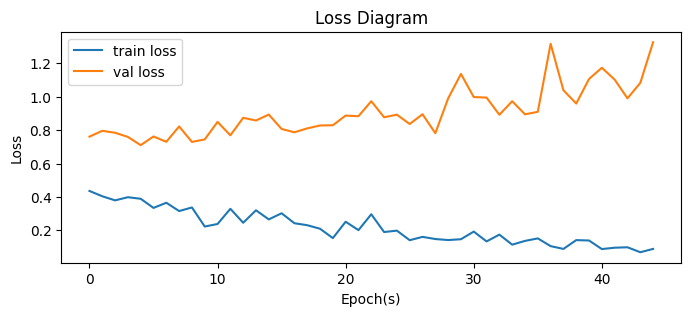

In [15]:
# Berikut adalah visualisasi nilai loss dari setiap iterasi training yang terjadi.
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.legend(['train loss', 'val loss'])
plt.title('Loss Diagram')
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.show()

In [16]:
# Model dapat disimpan dengan menggunakan perintah berikut.
model.save('model_acc_97.h5')

In [17]:
# Model dapat disimpan dengan menggunakan perintah berikut.
model.save('model_acc_97.keras')

In [30]:
model = load_model('model_acc_97.h5')

In [31]:
%matplotlib inline
#import matplotlib.pyplot as plt
#import numpy as np
#from google.colab import files
#from keras.preprocessing import image

path_test = "dataset/testing/rendang.jpg"
 
# predicting images
img = tf.keras.utils.load_img(path_test, target_size=(200, 200));
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

classes = model.predict(img_array/255);

for i, class_ in enumerate(classes[0]):
  if class_ == classes[0].max():
      if i == 0:
          print("bakso")
      elif i == 1:
          print("gado")
      elif i == 2:
          print("gudeg")
      elif i == 3:
          print("rendang")
      else:
          print("sate")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
sate
